In [5]:
import  modules.helpers as helpers

datasetPath = "../data/CURATED/dataset/alphabet-dataset/handwritten-data.csv"

In [6]:
helpers.load_az_dataset(datasetPath)

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [13]:
dataset = pd.read_csv(datasetPath).astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [14]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


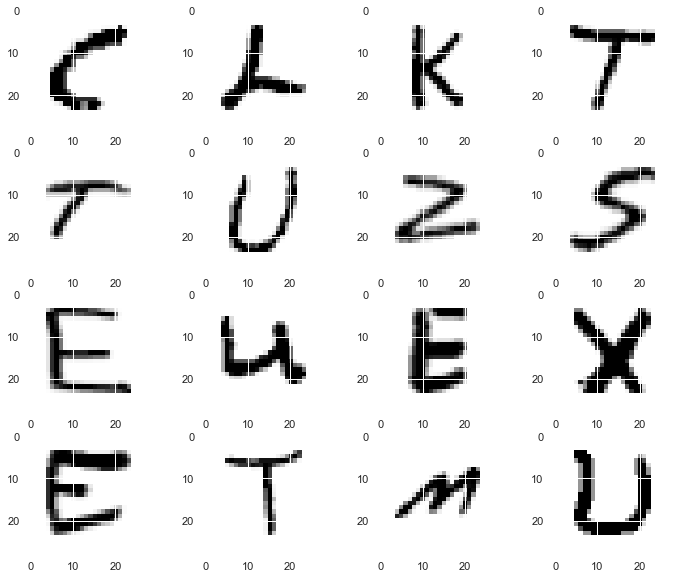

In [15]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

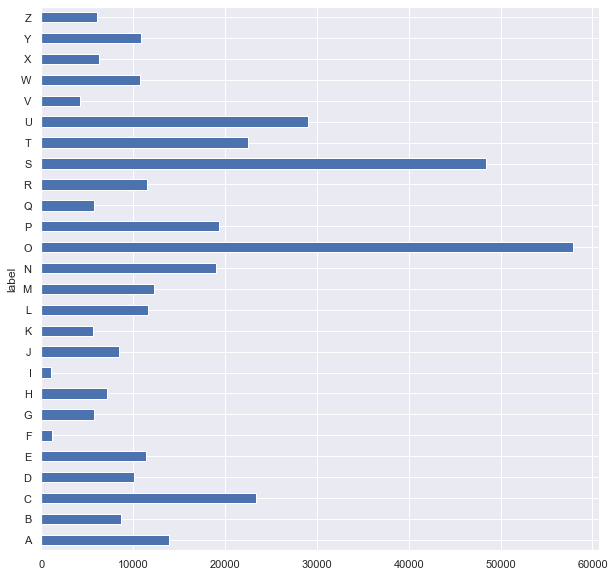

We have very low observations for I and F 
I count: 1120
F count: 1163


In [16]:

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [17]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


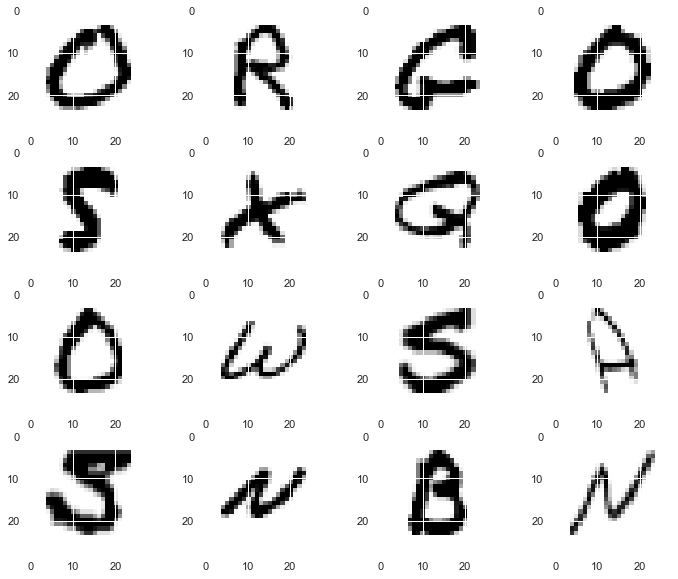

In [18]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [20]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 279337 samples, validate on 93113 samples
Epoch 1/18
279337/279337 - 476s - loss: 0.2224 - acc: 0.9383 - val_loss: 0.0898 - val_acc: 0.9759
Epoch 2/18
279337/279337 - 415s - loss: 0.0839 - acc: 0.9764 - val_loss: 0.0737 - val_acc: 0.9803
Epoch 3/18
279337/279337 - 392s - loss: 0.0642 - acc: 0.9817 - val_loss: 0.0741 - val_acc: 0.9794
Epoch 4/18
279337/279337 - 401s - loss: 0.0524 - acc: 0.9846 - val_loss: 0.0534 - val_acc: 0.9858
Epoch 5/18
279337/279337 - 384s - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0468 - val_acc: 0.9879
Epoch 6/18
279337/279337 - 354s - loss: 0.0374 - acc: 0.9889 - val_loss: 0.0441 - val_acc: 0.9889
Epoch 7/18
279337/279337 - 360s - loss: 0.0319 - acc: 0.9900 - val_loss: 0.0426 - val_acc: 0.9902
Epoch 8/18
279337/279337 - 354s - loss: 0.0267 - acc: 0.9915 - val_loss: 0.0416 - val_acc: 0.9901
Epoch 9/18
279337/279337 - 356s - loss: 0.0238 - acc: 0.9922 - val_loss: 0.0403 - va

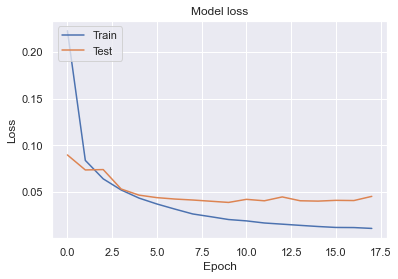

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<AxesSubplot:>

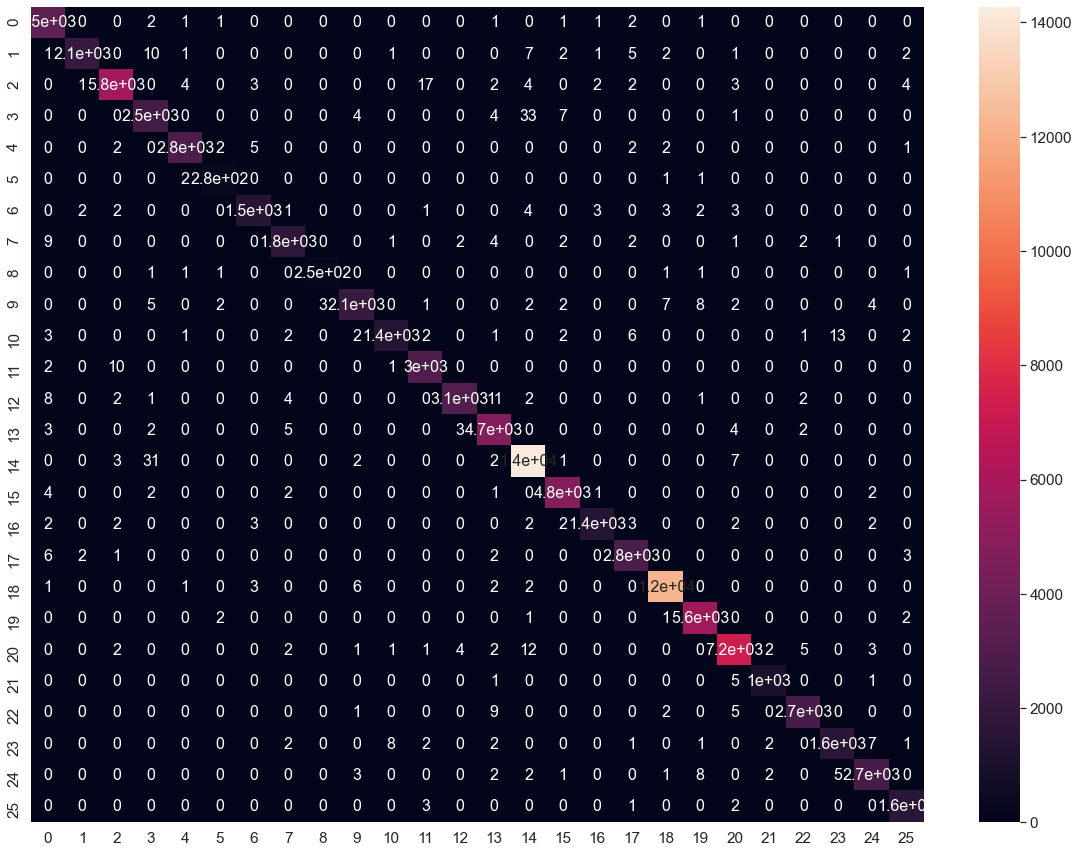

In [22]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(26),
                  range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [25]:
!pip install --upgrade pip
!pip install -U coremltools
import coremltools

cls.save('my_model.h5')

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
core_ml=coremltools.converters.keras.convert('my_model.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels,image_scale=1/255.0, is_bgr = False, image_input_names = "image")
core_ml.save('coreml_model.mlmodel')

Consider using the `--user` option or check the permissions.


  Attempting uninstall: pip
    Found existing installation: pip 20.2.2
    Uninstalling pip-20.2.2:
      Successfully uninstalled pip-20.2.2
  Created wheel for coremltools: filename=coremltools-4.0-py3-none-any.whl size=1022814 sha256=0ee58157e72d0c91795a120f796da3c47897900f505ba9eee5572da85d4ae7ed
  Stored in directory: c:\users\utilisateur\appdata\local\pip\cache\wheels\b7\01\bb\310564797b07ed203b725640eb21e672ccf9f83ba16e891b8d
  Created wheel for attr: filename=attr-0.3.1-py3-none-any.whl size=2462 sha256=3bf33fa94074ae96b3e0c4f8fba87667cc496e14e7c96f6c85bbc604421235be
  Stored in directory: c:\users\utilisateur\appdata\local\pip\cache\wheels\3b\5d\58\41fbe92f47031641008bd8559ee89e58bf0f123f9c18dea1cb
  Created wheel for mpmath: filename=mpmath-1.1.0-py3-none-any.whl size=532240 sha256=9152d356b77b727ddc55cc1182d04689e92573ae71ab8cf02144705d4c6f5773
  Stored in directory: c:\users\utilisateur\appdata\local\pip\cache\

AttributeError: module 'coremltools.converters.keras' has no attribute 'convert'

In [28]:
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 320, 240

# load the model we saved
model = load_model('model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img('../data/RAW/formation.jpeg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)

# predicting multiple images at once
img = image.load_img('test2.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print(classes)
print(classes[0])
print(classes[0][0])

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'name_scope'

In [ ]:
impor